In [8]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
import lime
from lime import lime_tabular
import matplotlib.pyplot as plt

# Only use Market index

In [30]:
bitcoin = pd.read_csv('bitcoin.csv', usecols=[5], skiprows=2, names=['bitcoin'])
ether = pd.read_csv('ethereum.csv', usecols=[5], skiprows=2, names=['ether'])
BDM_exlarge = pd.read_csv('SP_BDM_exlarge.csv', usecols=[5], skiprows=2, names=['BDM_exlarge'])
BDM = pd.read_csv('SP_BDM.csv', usecols=[5], skiprows=2, names=['BDM'])

# control
Russell2000 = pd.read_csv('Russell2000.csv', usecols=[2], skiprows=2, names=['Russell2000'])
VIX = pd.read_csv('VIX.csv', usecols=[2], skiprows=2, names=['VIX'])
bitVolumn = pd.read_csv('bitcoin volumn.csv', usecols=[1], names=['bitcoinVolumn'])
bitVolumn = bitVolumn['bitcoinVolumn'].pct_change()
bitVolumnpct= bitVolumn.drop([0], axis=0)
bitVolumnpct = bitVolumnpct.reset_index(drop=True)

df_control = pd.concat([Russell2000,VIX,bitVolumnpct], axis=1)
df_control

,Russell2000,VIX,bitcoinVolumn
0,0.017102,-0.128171,0.171360
1,0.002800,-0.014633,-0.125102
2,0.002792,-0.014851,0.094977
3,0.002785,-0.015074,0.092811
4,0.010446,-0.019754,0.138555
...,...,...,...
1760,-0.001625,0.009172,0.207490
1761,-0.001628,0.009089,0.184623
1762,-0.015719,0.022633,0.227672
1763,0.025685,-0.031617,0.082439


In [31]:
bitcoin_control = pd.concat([bitcoin,df_control], axis=1)
train, test = train_test_split(bitcoin_control, test_size = 0.3, random_state=42)
x_train = train.iloc[0:,1:13]
y_train = train.iloc[0:,0]
x_test = test.iloc[0:,1:13]
y_test = test.iloc[0:,0]
# Create a Gradient Boosting classifier
gb_clf = GradientBoostingClassifier(random_state=42)

# Set up the parameter grid for GridSearchCV
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'subsample': [0.5, 0.8, 1],
}

# Instantiate GridSearchCV with the Gradient Boosting classifier and the parameter grid
grid_search = GridSearchCV(gb_clf, param_grid, scoring='accuracy', cv=5, verbose=1)

# Fit the GridSearchCV object to the training data
grid_search.fit(x_train, y_train)

# Display the best parameters found by GridSearchCV
print("Best parameters found: ", grid_search.best_params_)

# Train the Gradient Boosting classifier with the best parameters
best_gb_clf = GradientBoostingClassifier(**grid_search.best_params_, random_state=42)
best_gb_clf.fit(x_train, y_train)

# Predict the labels for the test set
y_pred = best_gb_clf.predict(x_test)

# Calculate and display the accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters found:  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.5}
Accuracy:  0.5528301886792453
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.24      0.35       261
           1       0.54      0.86      0.66       269

    accuracy                           0.55       530
   macro avg       0.58      0.55      0.50       530
weighted avg       0.58      0.55      0.51       530



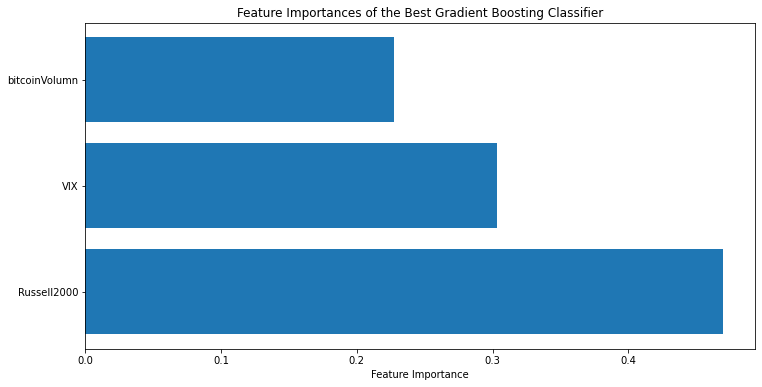

In [32]:
# Calculate feature importances
importances = best_gb_clf.feature_importances_

# Sort the feature importances and their corresponding indices
sorted_indices = np.argsort(importances)[::-1]

# Define feature_names as the column names of x_train
feature_names = x_train.columns

# Create a horizontal bar chart of the feature importances
plt.figure(figsize=(12, 6))
plt.barh(range(x_train.shape[1]), importances[sorted_indices])
plt.yticks(range(x_train.shape[1]), np.array(feature_names)[sorted_indices])
plt.xlabel('Feature Importance')
plt.title('Feature Importances of the Best Gradient Boosting Classifier')
plt.show()

# Market index +Sentiment index

In [33]:
df1 = pd.read_csv('1.gt_bitcoin.csv', usecols=[2], skiprows=2, names=['1.gt_bitcoin'])
df2 = pd.read_csv('2.gt_Buy_Bitcoin.csv', usecols=[2], skiprows=2, names=['2.gt_Buy_Bitcoin'])
df3 = pd.read_csv('3.gt_Sell_Bitcoin.csv', usecols=[2], skiprows=2, names=['3.gt_Sell_Bitcoin'])
df4 = pd.read_csv('4.gt_ethereum.csv', usecols=[2], skiprows=2, names=['4.gt_ethereum'])
df5 = pd.read_csv('5.gt_Ukraine_war.csv', usecols=[2], skiprows=2, names=['5.gt_Ukraine_war'])
df6 = pd.read_csv('6.gt_covid.csv', usecols=[2], skiprows=2, names=['6.gt_covid'])
df8 = pd.read_csv('8.CBDC_uncertainty.csv', usecols=[2], skiprows=2, names=['8.CBDC_uncertainty'])
df9 = pd.read_csv('9.CBDC_atten.csv', usecols=[2], skiprows=2, names=['9.CBDC_atten'])
df10 = pd.read_csv('10.news_senti.csv', usecols=[2], skiprows=2, names=['10.news_senti'])
df11 = pd.read_csv('11.fear&greed.csv', usecols=[2], skiprows=2, names=['11.fear&greed'])
df12 = pd.read_csv('12.tweets_pos.csv', usecols=[2], skiprows=2, names=['12.tweets_pos'])
df13 = pd.read_csv('13.tweets_neg.csv', usecols=[2], skiprows=2, names=['13.tweets_neg'])
df14 = pd.read_csv('14.twitter_btccrash_pos.csv', usecols=[2], skiprows=2, names=['14.twitter_btccrash_pos'])
df15 = pd.read_csv('15.twitter_btccrash_neg.csv', usecols=[2], skiprows=2, names=['15.twitter_btccrash_neg'])

# 1. Bitcoin

In [34]:
df_concat = pd.concat([df1,df9, df13], axis=1)
# replace "inf" with NaN
df_concat = df_concat.replace('inf', 0)
df_concat = df_concat.replace([np.inf, -np.inf], 0)
df_na = df_concat.fillna(0)
df_control = pd.concat([df_na,VIX,bitVolumnpct], axis=1)
df_control

,1.gt_bitcoin,9.CBDC_atten,13.tweets_neg,VIX,bitcoinVolumn
0,-0.004854,0.000321,0.514869,-0.128171,0.171360
1,-0.004878,-0.000248,-0.234322,-0.014633,-0.125102
2,-0.004902,-0.000248,0.100377,-0.014851,0.094977
3,0.019704,-0.000248,-0.182443,-0.015074,0.092811
4,0.019324,-0.000248,0.211336,-0.019754,0.138555
...,...,...,...,...,...
1760,-0.015873,-0.000637,0.144226,0.009172,0.207490
1761,-0.016129,-0.000638,0.098971,0.009089,0.184623
1762,-0.016393,-0.000638,0.026982,0.022633,0.227672
1763,-0.016667,-0.000639,-0.055837,-0.031617,0.082439


In [35]:
bitcoin_control = pd.concat([bitcoin,df_control], axis=1)
train, test = train_test_split(bitcoin_control, test_size = 0.3, random_state=42)
x_train = train.iloc[0:,1:6]
y_train = train.iloc[0:,0]
x_test = test.iloc[0:,1:6]
y_test = test.iloc[0:,0]
# Create a Gradient Boosting classifier
gb_clf = GradientBoostingClassifier(random_state=42)

# Set up the parameter grid for GridSearchCV
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'subsample': [0.5, 0.8, 1],
}

# Instantiate GridSearchCV with the Gradient Boosting classifier and the parameter grid
grid_search = GridSearchCV(gb_clf, param_grid, scoring='accuracy', cv=5, verbose=1)

# Fit the GridSearchCV object to the training data
grid_search.fit(x_train, y_train)

# Display the best parameters found by GridSearchCV
print("Best parameters found: ", grid_search.best_params_)

# Train the Gradient Boosting classifier with the best parameters
best_gb_clf = GradientBoostingClassifier(**grid_search.best_params_, random_state=42)
best_gb_clf.fit(x_train, y_train)

# Predict the labels for the test set
y_pred = best_gb_clf.predict(x_test)

# Calculate and display the accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters found:  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Accuracy:  0.5660377358490566
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.30      0.40       261
           1       0.55      0.83      0.66       269

    accuracy                           0.57       530
   macro avg       0.59      0.56      0.53       530
weighted avg       0.59      0.57      0.53       530



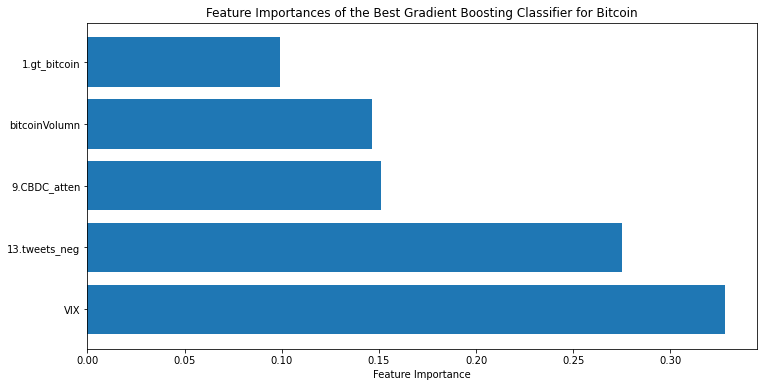

In [36]:
# Calculate feature importances
importances = best_gb_clf.feature_importances_

# Sort the feature importances and their corresponding indices
sorted_indices = np.argsort(importances)[::-1]

# Define feature_names as the column names of x_train
feature_names = x_train.columns

# Create a horizontal bar chart of the feature importances
plt.figure(figsize=(12, 6))
plt.barh(range(x_train.shape[1]), importances[sorted_indices])
plt.yticks(range(x_train.shape[1]), np.array(feature_names)[sorted_indices])
plt.xlabel('Feature Importance')
plt.title('Feature Importances of the Best Gradient Boosting Classifier for Bitcoin')
plt.show()

# 2. Ether

In [53]:
df_concat = pd.concat([df4,df11, df13], axis=1)
# replace "inf" with NaN
df_concat = df_concat.replace('inf', 0)
df_concat = df_concat.replace([np.inf, -np.inf], 0)
df_na = df_concat.fillna(0)
df_control = pd.concat([df_na,VIX,bitVolumnpct], axis=1)
df_control

,4.gt_ethereum,11.fear&greed,13.tweets_neg,VIX,bitcoinVolumn
0,-0.011494,0.236842,0.514869,-0.128171,0.171360
1,-0.011628,0.191489,-0.234322,-0.014633,-0.125102
2,-0.011765,-0.214286,0.100377,-0.014851,0.094977
3,-0.011905,0.250000,-0.182443,-0.015074,0.092811
4,-0.012048,0.072727,0.211336,-0.019754,0.138555
...,...,...,...,...,...
1760,0.142857,-0.034483,0.144226,0.009172,0.207490
1761,0.125000,-0.035714,0.098971,0.009089,0.184623
1762,0.111111,0.037037,0.026982,0.022633,0.227672
1763,0.100000,0.000000,-0.055837,-0.031617,0.082439


In [54]:
ether_control = pd.concat([ether,df_control], axis=1)
train, test = train_test_split(ether_control, test_size = 0.3)
x_train = train.iloc[0:,1:6]
y_train = train.iloc[0:,0]
x_test = test.iloc[0:,1:6]
y_test = test.iloc[0:,0]
# Create a Gradient Boosting classifier
gb_clf = GradientBoostingClassifier(random_state=42)

# Set up the parameter grid for GridSearchCV
param_grid = {
    'learning_rate': [0.001,0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200,500],
    'max_depth': [3, 4, 5],
    'subsample': [0.5, 0.8, 1],
}

# Instantiate GridSearchCV with the Gradient Boosting classifier and the parameter grid
grid_search = GridSearchCV(gb_clf, param_grid, scoring='accuracy', cv=5, verbose=1)

# Fit the GridSearchCV object to the training data
grid_search.fit(x_train, y_train)

# Display the best parameters found by GridSearchCV
print("Best parameters found: ", grid_search.best_params_)

# Train the Gradient Boosting classifier with the best parameters
best_gb_clf = GradientBoostingClassifier(**grid_search.best_params_, random_state=42)
best_gb_clf.fit(x_train, y_train)

# Predict the labels for the test set
y_pred = best_gb_clf.predict(x_test)

# Calculate and display the accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best parameters found:  {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.5}
Accuracy:  0.5509433962264151
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.41      0.49       277
           1       0.52      0.71      0.60       253

    accuracy                           0.55       530
   macro avg       0.56      0.56      0.54       530
weighted avg       0.56      0.55      0.54       530



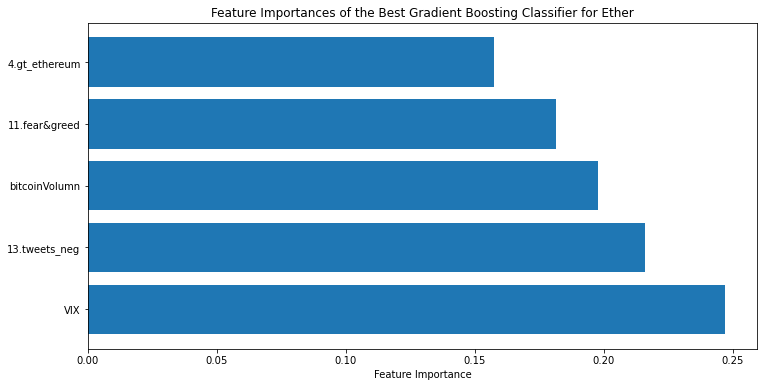

In [55]:
# Calculate feature importances
importances = best_gb_clf.feature_importances_

# Sort the feature importances and their corresponding indices
sorted_indices = np.argsort(importances)[::-1]

# Define feature_names as the column names of x_train
feature_names = x_train.columns

# Create a horizontal bar chart of the feature importances
plt.figure(figsize=(12, 6))
plt.barh(range(x_train.shape[1]), importances[sorted_indices])
plt.yticks(range(x_train.shape[1]), np.array(feature_names)[sorted_indices])
plt.xlabel('Feature Importance')
plt.title('Feature Importances of the Best Gradient Boosting Classifier for Ether')
plt.show()

# 3. BDM_exlarge

In [42]:
df_concat = pd.concat([df4, df6, df11, df12, df13], axis=1)
# replace "inf" with NaN
df_concat = df_concat.replace('inf', 0)
df_concat = df_concat.replace([np.inf, -np.inf], 0)
df_na = df_concat.fillna(0)
df_control = pd.concat([df_na,VIX,bitVolumnpct], axis=1)
df_control

,4.gt_ethereum,6.gt_covid,11.fear&greed,12.tweets_pos,13.tweets_neg,VIX,bitcoinVolumn
0,-0.011494,0.0,0.236842,-0.113559,0.514869,-0.128171,0.171360
1,-0.011628,0.0,0.191489,0.036830,-0.234322,-0.014633,-0.125102
2,-0.011765,0.0,-0.214286,0.063410,0.100377,-0.014851,0.094977
3,-0.011905,0.0,0.250000,-0.097288,-0.182443,-0.015074,0.092811
4,-0.012048,0.0,0.072727,-0.214515,0.211336,-0.019754,0.138555
...,...,...,...,...,...,...,...
1760,0.142857,0.0,-0.034483,-0.192200,0.144226,0.009172,0.207490
1761,0.125000,0.0,-0.035714,0.172758,0.098971,0.009089,0.184623
1762,0.111111,0.0,0.037037,-0.127630,0.026982,0.022633,0.227672
1763,0.100000,0.0,0.000000,0.165572,-0.055837,-0.031617,0.082439


In [43]:
BDM_exlarge_control = pd.concat([BDM_exlarge,df_control], axis=1)
train, test = train_test_split(BDM_exlarge_control, test_size = 0.3)
x_train = train.iloc[0:,1:8]
y_train = train.iloc[0:,0]
x_test = test.iloc[0:,1:8]
y_test = test.iloc[0:,0]
# Create a Gradient Boosting classifier
gb_clf = GradientBoostingClassifier(random_state=42)

# Set up the parameter grid for GridSearchCV
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'subsample': [0.5, 0.8, 1],
}

# Instantiate GridSearchCV with the Gradient Boosting classifier and the parameter grid
grid_search = GridSearchCV(gb_clf, param_grid, scoring='accuracy', cv=5, verbose=1)

# Fit the GridSearchCV object to the training data
grid_search.fit(x_train, y_train)

# Display the best parameters found by GridSearchCV
print("Best parameters found: ", grid_search.best_params_)

# Train the Gradient Boosting classifier with the best parameters
best_gb_clf = GradientBoostingClassifier(**grid_search.best_params_, random_state=42)
best_gb_clf.fit(x_train, y_train)

# Predict the labels for the test set
y_pred = best_gb_clf.predict(x_test)

# Calculate and display the accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters found:  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1}
Accuracy:  0.5886792452830188
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.30      0.40       249
           1       0.58      0.85      0.69       281

    accuracy                           0.59       530
   macro avg       0.60      0.57      0.55       530
weighted avg       0.60      0.59      0.55       530



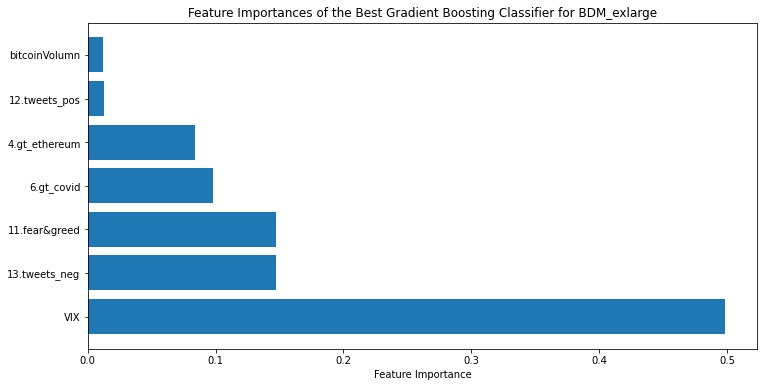

In [44]:
# Calculate feature importances
importances = best_gb_clf.feature_importances_

# Sort the feature importances and their corresponding indices
sorted_indices = np.argsort(importances)[::-1]

# Define feature_names as the column names of x_train
feature_names = x_train.columns

# Create a horizontal bar chart of the feature importances
plt.figure(figsize=(12, 6))
plt.barh(range(x_train.shape[1]), importances[sorted_indices])
plt.yticks(range(x_train.shape[1]), np.array(feature_names)[sorted_indices])
plt.xlabel('Feature Importance')
plt.title('Feature Importances of the Best Gradient Boosting Classifier for BDM_exlarge')
plt.show()

# 4. BDM

In [50]:
df_concat = pd.concat([df4, df6, df11, df12, df13], axis=1)
# replace "inf" with NaN
df_concat = df_concat.replace('inf', 0)
df_concat = df_concat.replace([np.inf, -np.inf], 0)
df_na = df_concat.fillna(0)
df_control = pd.concat([df_na,VIX,bitVolumnpct], axis=1)
df_control

,4.gt_ethereum,6.gt_covid,11.fear&greed,12.tweets_pos,13.tweets_neg,VIX,bitcoinVolumn
0,-0.011494,0.0,0.236842,-0.113559,0.514869,-0.128171,0.171360
1,-0.011628,0.0,0.191489,0.036830,-0.234322,-0.014633,-0.125102
2,-0.011765,0.0,-0.214286,0.063410,0.100377,-0.014851,0.094977
3,-0.011905,0.0,0.250000,-0.097288,-0.182443,-0.015074,0.092811
4,-0.012048,0.0,0.072727,-0.214515,0.211336,-0.019754,0.138555
...,...,...,...,...,...,...,...
1760,0.142857,0.0,-0.034483,-0.192200,0.144226,0.009172,0.207490
1761,0.125000,0.0,-0.035714,0.172758,0.098971,0.009089,0.184623
1762,0.111111,0.0,0.037037,-0.127630,0.026982,0.022633,0.227672
1763,0.100000,0.0,0.000000,0.165572,-0.055837,-0.031617,0.082439


In [51]:
BDM_control = pd.concat([BDM,df_control], axis=1)
train, test = train_test_split(BDM_control, test_size = 0.3)
x_train = train.iloc[0:,1:8]
y_train = train.iloc[0:,0]
x_test = test.iloc[0:,1:8]
y_test = test.iloc[0:,0]
# Create a Gradient Boosting classifier
gb_clf = GradientBoostingClassifier(random_state=42)

# Set up the parameter grid for GridSearchCV
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
    'n_estimators': [100, 200,300, 500,1000],
    'max_depth': [3, 4, 5],
    'subsample': [0.5, 0.8, 1],
}

# Instantiate GridSearchCV with the Gradient Boosting classifier and the parameter grid
grid_search = GridSearchCV(gb_clf, param_grid, scoring='accuracy', cv=5, verbose=1)

# Fit the GridSearchCV object to the training data
grid_search.fit(x_train, y_train)

# Display the best parameters found by GridSearchCV
print("Best parameters found: ", grid_search.best_params_)

# Train the Gradient Boosting classifier with the best parameters
best_gb_clf = GradientBoostingClassifier(**grid_search.best_params_, random_state=42)
best_gb_clf.fit(x_train, y_train)

# Predict the labels for the test set
y_pred = best_gb_clf.predict(x_test)

# Calculate and display the accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 225 candidates, totalling 1125 fits
Best parameters found:  {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 500, 'subsample': 1}
Accuracy:  0.6
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.34      0.44       242
           1       0.60      0.82      0.69       288

    accuracy                           0.60       530
   macro avg       0.60      0.58      0.56       530
weighted avg       0.60      0.60      0.57       530



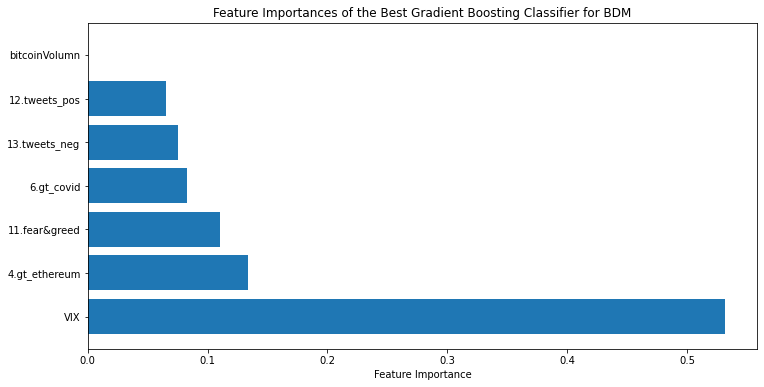

In [52]:
# Calculate feature importances
importances = best_gb_clf.feature_importances_

# Sort the feature importances and their corresponding indices
sorted_indices = np.argsort(importances)[::-1]

# Define feature_names as the column names of x_train
feature_names = x_train.columns

# Create a horizontal bar chart of the feature importances
plt.figure(figsize=(12, 6))
plt.barh(range(x_train.shape[1]), importances[sorted_indices])
plt.yticks(range(x_train.shape[1]), np.array(feature_names)[sorted_indices])
plt.xlabel('Feature Importance')
plt.title('Feature Importances of the Best Gradient Boosting Classifier for BDM')
plt.show()